In [1]:
import numpy as np
import pandas as pd
import math
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import scipy.stats as ss
from dython import nominal
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
#activate widgets for jupyter notebook
!jupyter nbextension enable --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
pip install ipywidgets 

In [4]:
pwd

'/Users/vinatigattupalli/Github_Classification/Code'

In [5]:
df=pd.read_csv("/Users/vinatigattupalli/Github_Classification/DataSets/Processed_Data/Feature_selected_data.csv",low_memory=False,index_col=0)

In [6]:
df.head()

,type,public,created_at,id,actor_id,actor_url,org_login,url,actor_attributes_type,repository_description,...,actor_attributes_name,actor_attributes_location,repository_homepage,repository_organization,actor_attributes_company,actor_attributes_blog,repo_id,repo_url,repo_name,actor_login
0,DeleteEvent,True,2011-03-01T15:00:00Z,1.159594e+09,392133.0,https://api.github.dev/users/errantepiphany,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,https://api.github.dev/repos//,/,errantepiphany
1,PushEvent,True,2011-03-01T15:00:01Z,1.159594e+09,606997.0,https://api.github.dev/users/cweybrec,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1340470.0,https://api.github.dev/repos/jmertic/KSU_Capst...,jmertic/KSU_Capstone_Spring_2011_PHP,cweybrec
2,PushEvent,True,2011-03-01T15:00:01Z,1.159594e+09,168797.0,https://api.github.dev/users/4poc,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1359693.0,https://api.github.dev/repos/4poc/feedability,4poc/feedability,4poc
3,PushEvent,True,2011-03-01T15:00:02Z,1.159594e+09,343705.0,https://api.github.dev/users/hvorragend,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1119734.0,https://api.github.dev/repos/landseer/BBCode,landseer/BBCode,hvorragend
4,PushEvent,True,2011-03-01T15:00:04Z,1.159594e+09,640615.0,https://api.github.dev/users/cs0rbagomba,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1421054.0,https://api.github.dev/repos/cs0rbagomba/cpp_u...,cs0rbagomba/cpp_utils,cs0rbagomba


In [7]:
df.shape


(14101, 35)

In [8]:
df.columns

Index(['type', 'public', 'created_at', 'id', 'actor_id', 'actor_url',
       'org_login', 'url', 'actor_attributes_type', 'repository_description',
       'repository_watchers', 'repository_stargazers', 'repository_forks',
       'repository_fork', 'repository_size', 'repository_owner',
       'repository_private', 'repository_open_issues', 'repository_has_issues',
       'repository_has_downloads', 'repository_has_wiki',
       'repository_language', 'repository_created_at', 'repository_pushed_at',
       'repository_master_branch', 'actor_attributes_name',
       'actor_attributes_location', 'repository_homepage',
       'repository_organization', 'actor_attributes_company',
       'actor_attributes_blog', 'repo_id', 'repo_url', 'repo_name',
       'actor_login'],
      dtype='object')

In [9]:
#dropping duplicate entries
df=df.drop_duplicates()

In [10]:
df.shape

(14087, 35)

In [11]:
#Checking the length of unique values in every column
for feature in df.columns:
    uniq = df[feature].unique()
    print("Unique in {} = {}".format(feature,len(uniq)))

Unique in type = 19
Unique in public = 1
Unique in created_at = 4612
Unique in id = 2407
Unique in actor_id = 1363
Unique in actor_url = 1364
Unique in org_login = 221
Unique in url = 10681
Unique in actor_attributes_type = 3
Unique in repository_description = 4733
Unique in repository_watchers = 1071
Unique in repository_stargazers = 1071
Unique in repository_forks = 568
Unique in repository_fork = 3
Unique in repository_size = 3475
Unique in repository_owner = 5572
Unique in repository_private = 2
Unique in repository_open_issues = 296
Unique in repository_has_issues = 3
Unique in repository_has_downloads = 3
Unique in repository_has_wiki = 3
Unique in repository_language = 81
Unique in repository_created_at = 6312
Unique in repository_pushed_at = 5059
Unique in repository_master_branch = 131
Unique in actor_attributes_name = 4035
Unique in actor_attributes_location = 1350
Unique in repository_homepage = 1424
Unique in repository_organization = 1483
Unique in actor_attributes_company

### All the values in public are true, this feature is not useful so delete it and delete id,actor_id,'repo_id'

In [12]:
df.drop(['public','id','actor_id','repo_id'],axis=1,inplace=True)

In [13]:
df.shape

(14087, 31)

## We are interested in getting the repository information. so explore it

In [14]:
len(df.repo_name.unique())

7055

In [15]:
df.repo_name.value_counts()

/                                371
git-lab                           66
slick                             55
Android-Pentago                   50
dotfiles                          40
                                ... 
mcai/FleximJ                       1
docpad-plugin-associatedfiles      1
irrigate                           1
jinja-breakdown                    1
SDCSH                              1
Name: repo_name, Length: 7054, dtype: int64

In [16]:
df_special=df[df["repo_name"]=='/']

In [17]:
indexes=df_special.index

## We see that there are 371 records with repository name / delete those rows

In [18]:
df.drop(indexes,inplace=True,axis=0)

In [19]:
df.repo_name.value_counts()

git-lab                         66
slick                           55
Android-Pentago                 50
dotfiles                        40
khmer                           37
                                ..
NDK-Samples                      1
treyhunner/django-extensions     1
book                             1
Global-Own                       1
SDCSH                            1
Name: repo_name, Length: 7053, dtype: int64

In [20]:
#grouping based on repo_names
repo_group=df.groupby('repo_name')

In [21]:
#seeing the group
repo_group.get_group('git-lab')


,type,created_at,actor_url,org_login,url,actor_attributes_type,repository_description,repository_watchers,repository_stargazers,repository_forks,...,repository_master_branch,actor_attributes_name,actor_attributes_location,repository_homepage,repository_organization,actor_attributes_company,actor_attributes_blog,repo_url,repo_name,actor_login
2631,MemberEvent,2014-04-01T15:06:03-07:00,NaN,NaN,https://github.com/2017csun/git-lab,User,CSCI 104 Lab 11 with Carrie && Greg,0.0,0.0,0.0,...,master,Carrie Sun,NaN,NaN,NaN,NaN,NaN,https://github.com/2017csun/git-lab,git-lab,2017csun
2853,CreateEvent,2014-04-01T15:07:16-07:00,NaN,NaN,https://github.com/wangal/git-lab,User,CSCI 104 - Lab 11 with Alice && Bob,0.0,0.0,0.0,...,master,Alexander Wang,NaN,NaN,NaN,NaN,NaN,https://github.com/wangal/git-lab,git-lab,wangal
3097,CreateEvent,2014-04-01T15:08:48-07:00,NaN,NaN,https://github.com/frost101207/git-lab,User,CS 104 lab - with Alice && Bob,0.0,0.0,0.0,...,master,Christopher Lee,NaN,NaN,NaN,NaN,NaN,https://github.com/frost101207/git-lab,git-lab,frost101207
3127,MemberEvent,2014-04-01T15:09:00-07:00,NaN,NaN,https://github.com/wangal/git-lab,User,CSCI 104 - Lab 11 with Alice && Bob,0.0,0.0,0.0,...,master,Alexander Wang,NaN,NaN,NaN,NaN,NaN,https://github.com/wangal/git-lab,git-lab,wangal
3180,MemberEvent,2014-04-01T15:09:20-07:00,NaN,NaN,https://github.com/frost101207/git-lab,User,CS 104 lab - with Alice && Bob,0.0,0.0,0.0,...,master,Christopher Lee,NaN,NaN,NaN,NaN,NaN,https://github.com/frost101207/git-lab,git-lab,frost101207
3195,CreateEvent,2014-04-01T15:09:22-07:00,NaN,NaN,https://github.com/cart587/git-lab,User,CSCI 104 - Lab 11 with Alice && Bob,0.0,0.0,0.0,...,master,Christin Carter,"Los Angeles, CA",NaN,NaN,NaN,NaN,https://github.com/cart587/git-lab,git-lab,cart587
3337,MemberEvent,2014-04-01T15:10:17-07:00,NaN,NaN,https://github.com/cart587/git-lab,User,CSCI 104 - Lab 11 with Alice && Bob,0.0,0.0,0.0,...,master,Christin Carter,"Los Angeles, CA",NaN,NaN,NaN,NaN,https://github.com/cart587/git-lab,git-lab,cart587
3395,MemberEvent,2014-04-01T15:10:36-07:00,NaN,NaN,https://github.com/laijessi/git-lab,User,CSCI 104- Lab 11 with Alice && Bob,0.0,0.0,0.0,...,master,Jessica Lai,NaN,NaN,NaN,NaN,NaN,https://github.com/laijessi/git-lab,git-lab,laijessi
3885,MemberEvent,2014-04-01T15:13:10-07:00,NaN,NaN,https://github.com/cart587/git-lab,User,CSCI 104 - Lab 11 with Alice && Bob,0.0,0.0,0.0,...,master,Christin Carter,"Los Angeles, CA",NaN,NaN,NaN,NaN,https://github.com/cart587/git-lab,git-lab,cart587
4365,PushEvent,2014-04-01T15:14:50-07:00,NaN,NaN,https://github.com/cart587/git-lab/compare/692...,User,CSCI 104 - Lab 11 with Alice && Bob,0.0,0.0,0.0,...,master,Christin Carter,"Los Angeles, CA",NaN,NaN,NaN,NaN,https://github.com/cart587/git-lab,git-lab,cart587


In [22]:
#getting number of rows per group
repo_group.size()

repo_name
-cs-spinner                 1
-tg-station                20
.emacs.d                    3
.vim                        2
.vimrc                      1
                           ..
zstickybar                  1
zuse-ios                    1
zuul                        3
zwhitman1701.github.io      1
zyiro/platform_manifest     3
Length: 7053, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13716 entries, 1 to 14100
Data columns (total 31 columns):
type                         13716 non-null object
created_at                   13716 non-null object
actor_url                    2035 non-null object
org_login                    431 non-null object
url                          11681 non-null object
actor_attributes_type        11590 non-null object
repository_description       9155 non-null object
repository_watchers          11500 non-null float64
repository_stargazers        11500 non-null float64
repository_forks             11500 non-null float64
repository_fork              11500 non-null object
repository_size              11500 non-null float64
repository_owner             11500 non-null object
repository_private           11500 non-null object
repository_open_issues       11500 non-null float64
repository_has_issues        11500 non-null object
repository_has_downloads     11500 non-null object
repository_has_wiki    

## Understanding the data types

In [24]:
df.dtypes

type                          object
created_at                    object
actor_url                     object
org_login                     object
url                           object
actor_attributes_type         object
repository_description        object
repository_watchers          float64
repository_stargazers        float64
repository_forks             float64
repository_fork               object
repository_size              float64
repository_owner              object
repository_private            object
repository_open_issues       float64
repository_has_issues         object
repository_has_downloads      object
repository_has_wiki           object
repository_language           object
repository_created_at         object
repository_pushed_at          object
repository_master_branch      object
actor_attributes_name         object
actor_attributes_location     object
repository_homepage           object
repository_organization       object
actor_attributes_company      object
a

In [25]:
df.dtypes.value_counts()

object     26
float64     5
dtype: int64

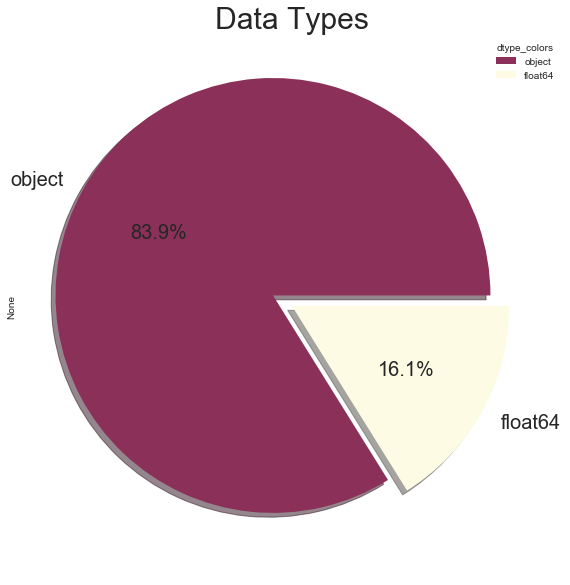

In [26]:
plt.style.use('seaborn-dark')
colors=['#8b3058','#fdfbe4']
startangle=360
explode=[0.1,0]
plt.rcParams['axes.titlesize']=30


plt.figure(figsize=(10,10));
#plt.pie(size,explode=explode,colors=colors,labels=labels,startangle=startangle,autopct='%1.01f%%', shadow=True,textprops={'fontsize': 20})

df.dtypes.value_counts().plot.pie(colors=colors,explode=explode,title="Data Types",autopct='%1.01f%%',startangle=startangle,shadow=True,textprops={'fontsize': 20});
plt.legend(title="dtype_colors");
plt.savefig('/Users/vinatigattupalli/Github_Classification/Visualizations/Dtypes_pie')

## Detecting null values in our full data frame

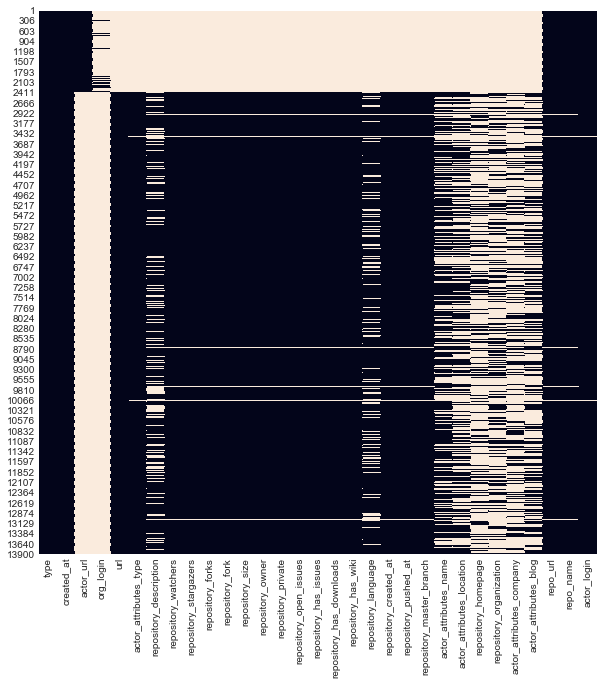

In [27]:
plt.figure(figsize=(10,10));
sns.heatmap(df.isnull(), cbar=False);
plt.savefig('/Users/vinatigattupalli/Github_Classification/Visualizations/Heatmap_null_values')

In [28]:
## From the above heat map we can observe that actor_url,org_url have most of the null values.
## we can delete those columns and also url column because it is not useful to us.
## To be more sure of other columns lets go datatype wise


In [29]:
df.dtypes.value_counts()

object     26
float64     5
dtype: int64

In [30]:
df.select_dtypes(include="object").head()

,type,created_at,actor_url,org_login,url,actor_attributes_type,repository_description,repository_fork,repository_owner,repository_private,...,repository_master_branch,actor_attributes_name,actor_attributes_location,repository_homepage,repository_organization,actor_attributes_company,actor_attributes_blog,repo_url,repo_name,actor_login
1,PushEvent,2011-03-01T15:00:01Z,https://api.github.dev/users/cweybrec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://api.github.dev/repos/jmertic/KSU_Capst...,jmertic/KSU_Capstone_Spring_2011_PHP,cweybrec
2,PushEvent,2011-03-01T15:00:01Z,https://api.github.dev/users/4poc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://api.github.dev/repos/4poc/feedability,4poc/feedability,4poc
3,PushEvent,2011-03-01T15:00:02Z,https://api.github.dev/users/hvorragend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://api.github.dev/repos/landseer/BBCode,landseer/BBCode,hvorragend
4,PushEvent,2011-03-01T15:00:04Z,https://api.github.dev/users/cs0rbagomba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://api.github.dev/repos/cs0rbagomba/cpp_u...,cs0rbagomba/cpp_utils,cs0rbagomba
5,PushEvent,2011-03-01T15:00:05Z,https://api.github.dev/users/fpipita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://api.github.dev/repos/fpipita/pyFolder,fpipita/pyFolder,fpipita


In [31]:
df.select_dtypes(include="float").head()

,repository_watchers,repository_stargazers,repository_forks,repository_size,repository_open_issues
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN


## Detecting null values in the dataset data type wise

### For Float

In [32]:
# Function to give the count of null values column wise and data-type wise
def null_values(df,datatype):
    nv=df.select_dtypes(include=datatype).isnull().sum()
    return nv

    

In [33]:
#null values for float type
print(null_values(df,"float"))

repository_watchers       2216
repository_stargazers     2216
repository_forks          2216
repository_size           2216
repository_open_issues    2216
dtype: int64


In [35]:
# Percentage of missing cells in the dataset for float
total_number_of_cells = df.size
null_cells_for_float_type=df.select_dtypes(include="float").isnull().sum()

Pecentage_float=(null_cells_for_float_type/total_number_of_cells)*100
print (Pecentage_float)

repository_watchers       0.521171
repository_stargazers     0.521171
repository_forks          0.521171
repository_size           0.521171
repository_open_issues    0.521171
dtype: float64


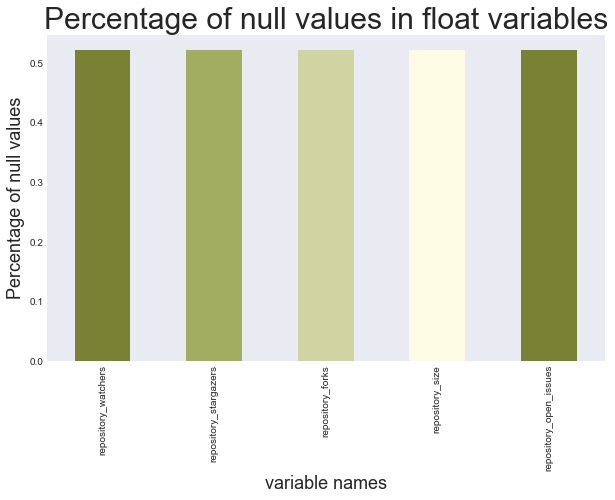

In [36]:
plt.figure(figsize=(10,6))
Pecentage_float.plot(kind='bar',color=['#798234','#a3ad62','#d0d3a2','#fdfbe4'],title="Percentage of null values in float variables" )
plt.xlabel('variable names',fontsize=18);
plt.ylabel('Percentage of null values',fontsize=18);
plt.savefig('/Users/vinatigattupalli/Github_Classification/Visualizations/Percentage_null_values_float')

In [37]:
df_median=df.select_dtypes(include="float").fillna(df.select_dtypes(include="float").median())

In [38]:
df_median.isnull().sum()

repository_watchers       0
repository_stargazers     0
repository_forks          0
repository_size           0
repository_open_issues    0
dtype: int64

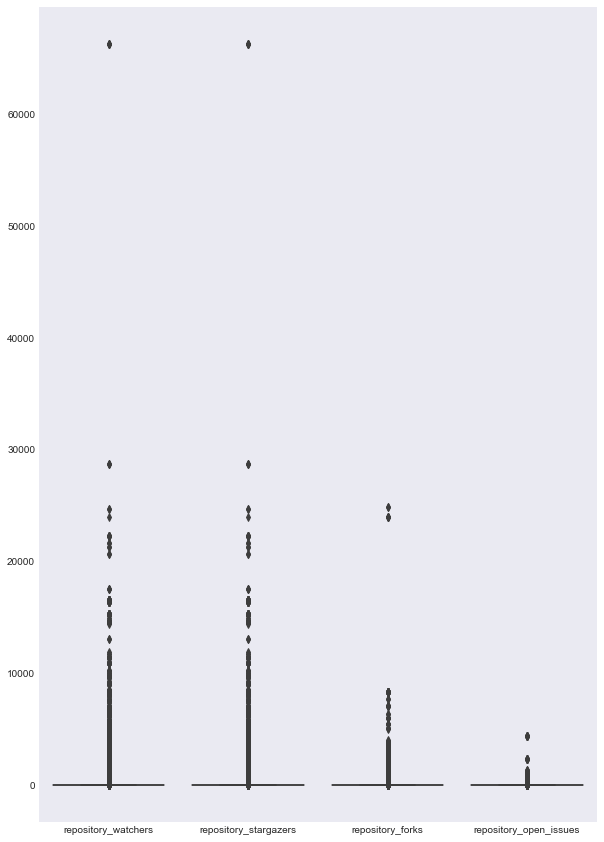

In [39]:
#exploratory data analysis
plt.figure(figsize=(10,15))
sns.boxplot(data=df_median.loc[:, df_median.columns != 'repository_size'])


In [40]:
#From the above box plot repository_size looks odd, lets explore it
df.repository_size.value_counts()

#df.repository_size.hist()

0.0         2667
2148.0        55
2232.0        54
126350.0      37
1452.0        37
            ... 
60500.0        1
383990.0       1
3256.0         1
2288.0         1
7907.0         1
Name: repository_size, Length: 3474, dtype: int64

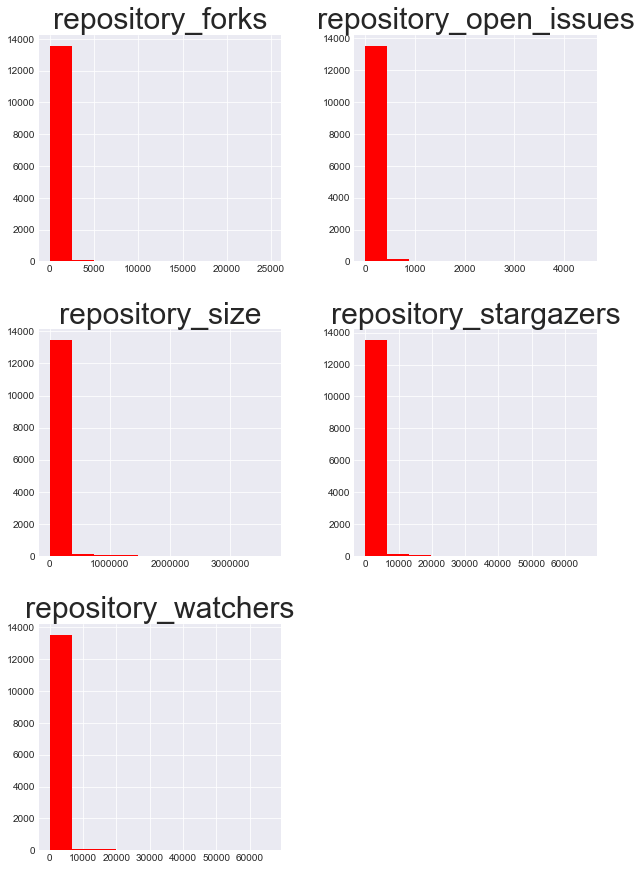

In [41]:
df_median.hist(figsize=(10,15),color=['red'],bins=10);

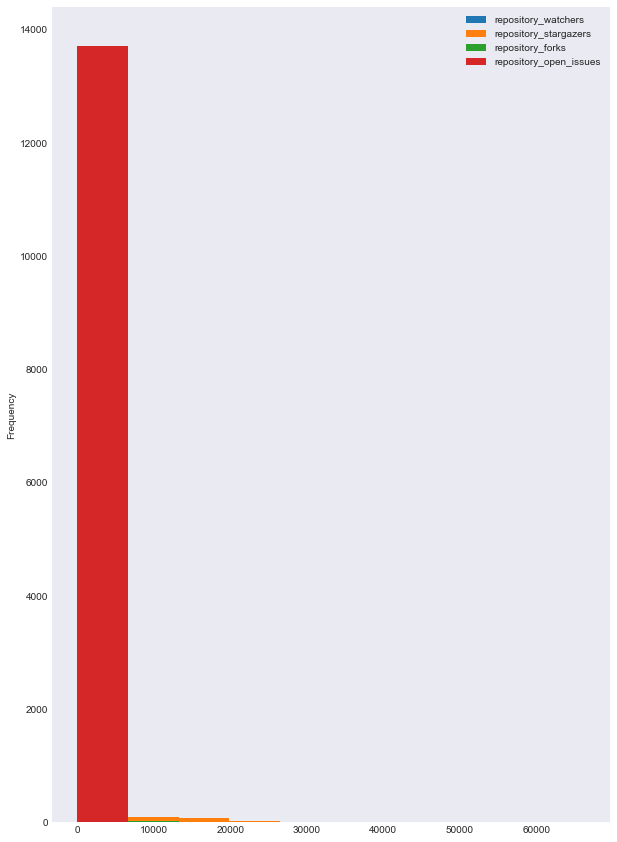

In [42]:
df_median.loc[:,df_median.columns!='repository_size'].plot.hist(figsize=(10,15))


In [43]:
df.repository_open_issues.value_counts()

0.0       6399
1.0        983
2.0        424
3.0        334
4.0        269
          ... 
321.0        1
2328.0       1
151.0        1
437.0        1
223.0        1
Name: repository_open_issues, Length: 295, dtype: int64

In [44]:
df_median.describe()

,repository_watchers,repository_stargazers,repository_forks,repository_size,repository_open_issues
count,13716.000000,13716.000000,13716.000000,1.371600e+04,13716.000000
mean,422.721931,422.721931,113.100102,3.500673e+04,24.759988
std,2195.218482,2195.218482,759.846362,1.566010e+05,156.261409
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,1.930000e+02,0.000000
50%,1.000000,1.000000,0.000000,1.452000e+03,0.000000
75%,18.000000,18.000000,7.000000,8.808000e+03,3.000000
max,66275.000000,66275.000000,24915.000000,3.667436e+06,4435.000000


In [45]:
# converting the float data type into int
df_int=df_median.astype('int')

In [46]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13716 entries, 1 to 14100
Data columns (total 5 columns):
repository_watchers       13716 non-null int64
repository_stargazers     13716 non-null int64
repository_forks          13716 non-null int64
repository_size           13716 non-null int64
repository_open_issues    13716 non-null int64
dtypes: int64(5)
memory usage: 642.9 KB


In [47]:
# Putting back df_int into the main dataframe
df[["repository_forks","repository_stargazers","repository_open_issues","repository_size","repository_watchers"]]=df_int[["repository_forks","repository_stargazers","repository_open_issues","repository_size","repository_watchers"]]

In [48]:
df.isnull().sum()

type                             0
created_at                       0
actor_url                    11681
org_login                    13285
url                           2035
actor_attributes_type         2126
repository_description        4561
repository_watchers              0
repository_stargazers            0
repository_forks                 0
repository_fork               2216
repository_size                  0
repository_owner              2216
repository_private            2216
repository_open_issues           0
repository_has_issues         2216
repository_has_downloads      2216
repository_has_wiki           2216
repository_language           4038
repository_created_at         2216
repository_pushed_at          2218
repository_master_branch      2216
actor_attributes_name         5670
actor_attributes_location     7872
repository_homepage          10573
repository_organization       9582
actor_attributes_company     10030
actor_attributes_blog         8760
repo_url            

### For object data-type

In [49]:
df_object=df.select_dtypes(include="object")

In [50]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13716 entries, 1 to 14100
Data columns (total 26 columns):
type                         13716 non-null object
created_at                   13716 non-null object
actor_url                    2035 non-null object
org_login                    431 non-null object
url                          11681 non-null object
actor_attributes_type        11590 non-null object
repository_description       9155 non-null object
repository_fork              11500 non-null object
repository_owner             11500 non-null object
repository_private           11500 non-null object
repository_has_issues        11500 non-null object
repository_has_downloads     11500 non-null object
repository_has_wiki          11500 non-null object
repository_language          9678 non-null object
repository_created_at        11500 non-null object
repository_pushed_at         11498 non-null object
repository_master_branch     11500 non-null object
actor_attributes_name        

In [51]:
df_object.isnull().sum()

type                             0
created_at                       0
actor_url                    11681
org_login                    13285
url                           2035
actor_attributes_type         2126
repository_description        4561
repository_fork               2216
repository_owner              2216
repository_private            2216
repository_has_issues         2216
repository_has_downloads      2216
repository_has_wiki           2216
repository_language           4038
repository_created_at         2216
repository_pushed_at          2218
repository_master_branch      2216
actor_attributes_name         5670
actor_attributes_location     7872
repository_homepage          10573
repository_organization       9582
actor_attributes_company     10030
actor_attributes_blog         8760
repo_url                       181
repo_name                      182
actor_login                     91
dtype: int64

In [52]:
def percentage_missing_values_dtype(df,Dtype):
    df_object=df.select_dtypes(include=Dtype)
    number_of_null_cells=df_object.isnull().sum()
    Percentage_object_columnwise=(number_of_null_cells/df.shape[0])*100
    return Percentage_object_columnwise

In [53]:
Percentage_object_columnwise=percentage_missing_values_dtype(df,'object')
print(Percentage_object_columnwise)


type                          0.000000
created_at                    0.000000
actor_url                    85.163313
org_login                    96.857684
url                          14.836687
actor_attributes_type        15.500146
repository_description       33.253135
repository_fork              16.156314
repository_owner             16.156314
repository_private           16.156314
repository_has_issues        16.156314
repository_has_downloads     16.156314
repository_has_wiki          16.156314
repository_language          29.440070
repository_created_at        16.156314
repository_pushed_at         16.170895
repository_master_branch     16.156314
actor_attributes_name        41.338583
actor_attributes_location    57.392826
repository_homepage          77.085156
repository_organization      69.860017
actor_attributes_company     73.126276
actor_attributes_blog        63.867017
repo_url                      1.319627
repo_name                     1.326917
actor_login              

In [1]:
plt.figure(facecolor='#e4c7f1');
plt.figure(figsize=(10,10));
Percentage_object_columnwise.plot.pie(title='Null values in object',autopct='%1.01f%%');
plt.savefig('/Users/vinatigattupalli/Github_Classification/Visualizations/Percentage_null_values_object');


NameError: name 'plt' is not defined

## Working on handling missing data for all the above object data types

In [55]:
#Delete the columns which have more than 50 percent missing data and deleting url, becos it is of least prominance

df.drop(['actor_url','org_login','repository_homepage','repository_organization','actor_attributes_company','actor_attributes_blog','actor_attributes_location','url'],axis=1,inplace=True)

In [56]:
Percentage_object_columnwise=percentage_missing_values_dtype(df,'object')
print(Percentage_object_columnwise)

type                         0.000000
created_at                   0.000000
actor_attributes_type       15.500146
repository_description      33.253135
repository_fork             16.156314
repository_owner            16.156314
repository_private          16.156314
repository_has_issues       16.156314
repository_has_downloads    16.156314
repository_has_wiki         16.156314
repository_language         29.440070
repository_created_at       16.156314
repository_pushed_at        16.170895
repository_master_branch    16.156314
actor_attributes_name       41.338583
repo_url                     1.319627
repo_name                    1.326917
actor_login                  0.663459
dtype: float64


## For the above variables lets understand the data type and their handling
### 1. type- 

### df['type'].value_counts().count()

### Type is categorical

### 2.created_at

### created_at is time, it is a continuous variable, we need to convert it to datetime64[ns] format.

### 2.actor_attributes_type

### df['actor_attributes_type'].value_counts()

### actor_attributes_type has categories, two categorical variables

### 3.repository_description it is a string data type and can be object dtype in pandas

### 4.repository_fork

### df['repository_fork'].value_counts()

### repository_fork is a True or False category.Should be converted into binary 0 or 1.It will be a bool data type

### 5.repository_owner

### df['repository_owner'].value_counts().count()

### Repository owner is the name of the repository owner.We have a transactional data set so there can be many  transactions of a particular repository owner. It becomes a categorical variable with thousands of categories.

### As of now we put it as a object or string variable.

### 6.repository_private

### df['repository_private'].value_counts()

### repository_private says if a repository is private or no . It has only one false value can have many values in the future. Convert into bool.


### 7.repository_has_issues

### df['repository_has_issues'].value_counts()

###  repository_has_issues says if a repository has issues or no. It has true or false value. Convert to bool.

### 8.repository_has_downloads

### df['repository_has_downloads'].value_counts()

### repository_has_downloads says if a repository has downloads or no. It has true or false value. Convert to bool.

### 9.repository_language

### df['repository_language'].value_counts().count()

### repository_language has says in which language the code is written. We will convert it to categorical variables.

### It has about 80 different variables

### 10.repository_created_at

### df['repository_created_at'].isnull().sum()

### repository_created_at gives the time information about time at which the repo was created.

### 11.repository_pushed_at

### gives the information when the changes have been made into the repository and needs to be converted as time dtyoe

### 12.repository_master_branch

### df['repository_master_branch'].value_counts()

### repository_master_branch gives information about the branch of the repository.It has 80 different categories and needs to be converted as a categorical variable

### 13.actor_attributes_name

### df['actor_attributes_name'].value_counts()

### actor_attributes_name is the name of the actor doing this transaction. they are actually nominal variables.But since this is a transactional data it is becoming categotical.I decide to convert it into categorical variable

### 14.repo_url

### repo_url is the repository url. We can put this as object type.

### 15.repo_name

### df['repo_name'].value_counts().count()

### repo_name is the name of the repository. We will convert it into categorical variable.

### 16.actor_login

### df['actor_login'].value_counts()

### actor_login is the login id of the actors. I convert this into categorical variable




In [57]:
df.shape

(13716, 23)

In [58]:
# Conversion of dtypes to categories
df[['type','actor_attributes_type','repository_owner','repository_language','repository_master_branch','actor_attributes_name',
   'repo_name','actor_login']]=df[['type','actor_attributes_type','repository_owner','repository_language','repository_master_branch','actor_attributes_name',
   'repo_name','actor_login']].astype('category')    
       

In [59]:
df.repository_master_branch.dtype

CategoricalDtype(categories=['0.20', '0.3', '0.4', '0.6.0', '1.0-branch', '1.1.x', '1.8',
                  '2.1', '2.3/develop', '2.6',
                  ...
                  'v160', 'v2.1.9', 'v2_arbor', 'v3-stable', 'v3.0', 'vanir',
                  'weekly', 'wmm', 'wyplay-2.1.4', 'xlnx/master-rebase'],
                 ordered=False)

In [60]:
#conversion to bool
df[['repository_private','repository_has_issues','repository_has_downloads','repository_has_wiki','repository_fork']]=df[['repository_private','repository_has_issues','repository_has_downloads','repository_has_wiki','repository_fork']].astype(bool)


In [61]:
df.repository_has_issues.dtype

dtype('bool')

## Handling the missing values in categorical and bool variables

In [62]:
# Filling the missing categorical values using mode
mode=df[['actor_attributes_type','repository_master_branch','repository_language']].mode()

In [63]:
df[['actor_attributes_type','repository_master_branch','repository_language']]=df[['actor_attributes_type','repository_master_branch','repository_language']].fillna(mode.iloc[0])

In [64]:
df['actor_attributes_type'].value_counts()

User            13560
Organization      156
Name: actor_attributes_type, dtype: int64

In [65]:
# Filling the missing boolean values with mode
mode_bool=df[['repository_private','repository_has_issues','repository_has_downloads','repository_has_wiki']].mode()
df[['repository_private','repository_has_issues','repository_has_downloads','repository_has_wiki']]=df[['repository_private','repository_has_issues','repository_has_downloads','repository_has_wiki']].fillna(mode.iloc[0])

In [66]:
#repository_owner, actor_attributes_name,actor_login,repo_name they seem similar
df[["repository_owner", "actor_attributes_name","actor_login","repo_name","type","repository_description","repository_master_branch"]].head()

,repository_owner,actor_attributes_name,actor_login,repo_name,type,repository_description,repository_master_branch
1,NaN,NaN,cweybrec,jmertic/KSU_Capstone_Spring_2011_PHP,PushEvent,NaN,master
2,NaN,NaN,4poc,4poc/feedability,PushEvent,NaN,master
3,NaN,NaN,hvorragend,landseer/BBCode,PushEvent,NaN,master
4,NaN,NaN,cs0rbagomba,cs0rbagomba/cpp_utils,PushEvent,NaN,master
5,NaN,NaN,fpipita,fpipita/pyFolder,PushEvent,NaN,master


In [67]:
# Going back to the repo groups
#grouping based on repo_names
repo_group=df.groupby('repo_name')

#seeing the group
repo_gitlab=repo_group.get_group('slick')
repo_gitlab.describe()

,repository_watchers,repository_stargazers,repository_forks,repository_size,repository_open_issues
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,2691.181818,2691.181818,126.072727,2167.400000,8.581818
std,367.468975,367.468975,16.910280,143.874251,1.117055
min,17.000000,17.000000,3.000000,2148.000000,2.000000
25%,2729.500000,2729.500000,128.000000,2148.000000,8.000000
50%,2741.000000,2741.000000,128.000000,2148.000000,9.000000
75%,2750.500000,2750.500000,129.000000,2148.000000,9.000000
max,2761.000000,2761.000000,130.000000,3215.000000,10.000000


In [68]:
repo_gitlab.repository_watchers.max()

2761

## we can see that all the integer variables are same for that group

In [69]:
repo_gitlab.describe(include='all')

,type,created_at,actor_attributes_type,repository_description,repository_watchers,repository_stargazers,repository_forks,repository_fork,repository_size,repository_owner,...,repository_has_downloads,repository_has_wiki,repository_language,repository_created_at,repository_pushed_at,repository_master_branch,actor_attributes_name,repo_url,repo_name,actor_login
count,55,55,55,55,55.000000,55.000000,55.000000,55,55.000000,55,...,55,55,55,55,55,55,42,55,55,55
unique,4,53,1,2,NaN,NaN,NaN,2,NaN,2,...,1,1,1,2,2,1,38,2,1,49
top,WatchEvent,2014-04-01T15:48:35-07:00,User,the last carousel you'll ever need,NaN,NaN,NaN,False,NaN,kenwheeler,...,True,True,JavaScript,2014-03-23T19:10:05-07:00,2014-04-01T14:46:01-07:00,master,Ken Wheeler,https://github.com/kenwheeler/slick,slick,verprox
freq,44,2,55,54,NaN,NaN,NaN,54,NaN,54,...,55,55,55,54,54,55,3,54,55,3
mean,NaN,NaN,NaN,NaN,2691.181818,2691.181818,126.072727,NaN,2167.400000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,367.468975,367.468975,16.910280,NaN,143.874251,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,17.000000,17.000000,3.000000,NaN,2148.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2729.500000,2729.500000,128.000000,NaN,2148.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2741.000000,2741.000000,128.000000,NaN,2148.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2750.500000,2750.500000,129.000000,NaN,2148.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# I am interested in repository_description
repo_des=repo_gitlab[['repository_description','type']].groupby('type')

In [71]:
repo_des.first()

,repository_description
type,
CommitCommentEvent,NaN
CreateEvent,NaN
DeleteEvent,NaN
DownloadEvent,NaN
ForkApplyEvent,NaN
ForkEvent,the last carousel you'll ever need
GistEvent,NaN
GollumEvent,NaN
IssueCommentEvent,the last carousel you'll ever need


In [72]:
x=df[['repository_description','type']].groupby('type')
x.first()

,repository_description
type,
CommitCommentEvent,Web Development Evolved - The Firebug you have...
CreateEvent,Sample app I created to get familiar with Retr...
DeleteEvent,Free and open source full-stack enterprise fra...
DownloadEvent,NaN
ForkApplyEvent,NaN
ForkEvent,"The fastest Node.js module for resizing JPEG, ..."
GistEvent,NaN
GollumEvent,DataGenerator is a testing tool that allows th...
IssueCommentEvent,A Distributed init System


## I have decided to select the single entry of the repository which is the most recent one 

In [73]:
repo_group['created_at'].max()

repo_name
-cs-spinner                2014-04-01T16:01:23-07:00
-tg-station                2014-04-01T16:03:53-07:00
.emacs.d                   2014-04-01T15:52:38-07:00
.vim                       2014-04-01T15:36:49-07:00
.vimrc                     2014-04-01T16:01:47-07:00
                                     ...            
zstickybar                 2014-04-01T15:08:34-07:00
zuse-ios                   2014-04-01T15:11:40-07:00
zuul                       2014-04-01T15:32:40-07:00
zwhitman1701.github.io     2014-04-01T15:42:16-07:00
zyiro/platform_manifest         2011-03-01T15:56:55Z
Name: created_at, Length: 7053, dtype: object

In [77]:
#df_main=df.loc[df.groupby('repo_name').created_at.idxmax(),:]
#df.groupby('repo_name').repository_forks.idxmax()
#df_main=df.loc[df.groupby('repo_name').repository_forks.idxmax(),:]
sorted = df.sort_values(by='created_at')
df_main = sorted.drop_duplicates('repo_name', keep='last')

In [95]:
y=df_main[['repo_name','repository_description','repository_forks']].groupby('repo_name')
y.first()

,repository_description,repository_forks
repo_name,,
-cs-spinner,pure css loading animations with minimal effort!,33
-tg-station,/tg/'s SS13 branch,456
.emacs.d,NaN,0
.vim,Plugins and configuration files that I use in vim,0
.vimrc,Distro vim,1
048bf2ec1d03577b6f340a6baf467f49,NaN,0
12meses12katas/Marzo-FizzBuzz,NaN,0
15muebles,WordPress theme for the site 15muebles.org,0
16.831,"Vertigo, ORF, Thermocam, & CMG code",0


In [89]:
# Going back to the repo groups
#grouping based on repo_names
repo_group=df_main.groupby('repo_name')

#seeing the group
repo_gitlab=repo_group.get_group('slick')

In [96]:
x=repo_gitlab[['type','repository_description']].groupby('type')
x.first()

,repository_description
type,
CommitCommentEvent,NaN
CreateEvent,NaN
DeleteEvent,NaN
DownloadEvent,NaN
ForkApplyEvent,NaN
ForkEvent,the last carousel you'll ever need
GistEvent,NaN
GollumEvent,NaN
IssueCommentEvent,NaN


In [98]:
#converting into csv and excel
df_main.to_excel('/Users/vinatigattupalli/Github_Classification/Datasets/Processed_Data/Repo_dataset.xlsx',engine='xlsxwriter')
df_main.to_csv(r'/Users/vinatigattupalli/Github_Classification/Datasets/Processed_Data/Repo_dataset.csv')